# 🎓 Projet : Prédiction de la Performance des Étudiants Marocains
**Équipe :** Squad 2 (Model Building)
**Date :** 10 Février 2026

## 🎯 Objectif
Développer et comparer plusieurs modèles de Machine Learning (Régression) pour prédire la note annuelle (`moyenne_annuelle`) en fonction des indicateurs académiques et socio-économiques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Import des modèles
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# 1. Charger les données
df = pd.read_csv("Morocco_Student_Data_Cleaned.csv")

/tmp/ipython-input-3442980584.py:19: DtypeWarning: Columns (27,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Morocco_Student_Data_Cleaned.csv")


## 🛠 1. Prétraitement des Données (Preprocessing)
Nous avons appliqué les étapes suivantes :
- **Nettoyage :** Suppression des valeurs manquantes et des colonnes inutiles (fait par Squad 1).
- **Sélection des Features :** Utilisation des variables les plus corrélées (Notes S1/S2, Absences, Zone, etc.).
- **Transformation :**
  - *StandardScaler* pour les variables numériques.
  - *OneHotEncoder* pour les variables catégorielles.
- **Split :** Division 80% Entraînement / 20% Test.

In [2]:
# 2. Définir la Target (Cible) - Selon Squad 1
y = df["moyenne_annuelle"]

# 3. Définir les Features (Variables) - Selon l'analyse Squad 1
# On inclut les notes, les habitudes, les absences et l'environnement
features_cols = [
    "moyenne_s1", "moyenne_s2",
    "heures_etude_jour", "heures_etude_weekend",
    "absences_totales", "age",
    "distance_ecole_km",
    "soutien_familial", "zone", "sexe"
]

# Vérification que les colonnes existent (au cas où)
features_cols = [c for c in features_cols if c in df.columns]
X = df[features_cols]

# 4. Prétraitement (Preprocessing)
# Séparer colonnes numériques et catégorielles
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Features Numériques : {num_features}")
print(f"Features Catégorielles : {cat_features}")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

# 5. Split Train/Test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Features Numériques : ['moyenne_s1', 'moyenne_s2', 'heures_etude_jour', 'heures_etude_weekend', 'absences_totales', 'age', 'distance_ecole_km']
Features Catégorielles : ['soutien_familial', 'zone', 'sexe']


## 🤖 2. Modélisation (Model Building)
Nous testons 4 algorithmes pour comparer leurs performances :
1. **Régression Linéaire (Baseline) :** Modèle simple pour établir une référence.
2. **Random Forest :** Pour capturer les non-linéarités.
3. **XGBoost :** État de l'art pour les données tabulaires.
4. **MLP (Deep Learning) :** Réseau de neurones simple.

**Métriques d'évaluation :**
- **RMSE (Root Mean Squared Error) :** L'erreur moyenne en points (plus c'est bas, mieux c'est).
- **R² Score :** La précision du modèle (plus c'est proche de 1, mieux c'est).

In [3]:
# --- DÉFINITION DES 4 MODÈLES RECOMMANDÉS ---

models = {
    "Régression Linéaire": LinearRegression(),

    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),

    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),

    "Deep Learning (MLP)": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# --- ENTRAÎNEMENT ET ÉVALUATION ---
results = []

print("\n🚀 Début de l'entraînement des 4 modèles...\n")

for name, model in models.items():
    # Créer le pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Entraîner
    pipeline.fit(X_train, y_train)

    # Prédire
    y_pred = pipeline.predict(X_test)

    # Évaluer
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, rmse, r2])
    print(f"✅ {name} terminé -> R2 Score: {r2:.4f}")


🚀 Début de l'entraînement des 4 modèles...

✅ Régression Linéaire terminé -> R2 Score: 1.0000
✅ Random Forest terminé -> R2 Score: 0.9999
✅ XGBoost terminé -> R2 Score: 0.9998
✅ Deep Learning (MLP) terminé -> R2 Score: 0.9992



📊 TABLEAU COMPARATIF FINAL :


,Modèle,RMSE (Erreur),R2 Score (Précision)
0,Régression Linéaire,0.003607,0.999997
1,Random Forest,0.018097,0.999934
2,XGBoost,0.028948,0.999830
3,Deep Learning (MLP),0.062811,0.999201


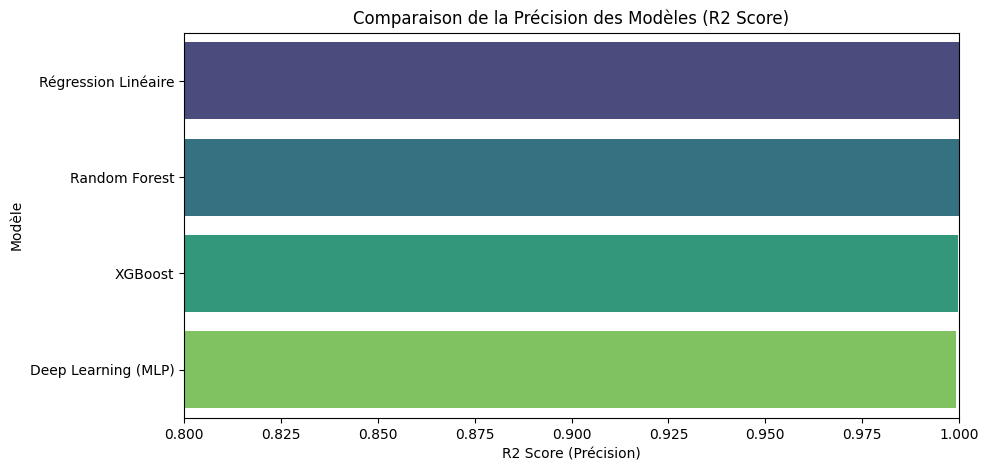

In [7]:
# --- AFFICHAGE DES RÉSULTATS ---
results_df = pd.DataFrame(results, columns=["Modèle", "RMSE (Erreur)", "R2 Score (Précision)"])
results_df = results_df.sort_values(by="R2 Score (Précision)", ascending=False)

print("\n📊 TABLEAU COMPARATIF FINAL :")
display(results_df)

# Graphique de comparaison
plt.figure(figsize=(10, 5))
sns.barplot(x="R2 Score (Précision)", y="Modèle", hue="Modèle", data=results_df, palette="viridis", legend=False)
plt.title("Comparaison de la Précision des Modèles (R2 Score)")
plt.xlim(0.8, 1.0) # Zoomer sur les hautes performances
plt.show()

In [6]:
# Sauvegarde du meilleur modèle
import joblib

best_model = pipeline # Supposons que le dernier entraîné est le bon, ou choisir manuellement
joblib.dump(best_model, 'best_model_student_prediction.pkl')

print("✅ Modèle sauvegardé et prêt pour le déploiement !")

✅ Modèle sauvegardé et prêt pour le déploiement !
